# Goal: apply inferential statistics to the Pitchfork reviews dataset and explore correlations within it.

Music genres data is from here: https://www.kaggle.com/nolanbconaway/pitchfork-data <br>
The rest of the data is from here (CSV file): https://drive.google.com/open?id=1e71-A3yuAuS0Ew0OipzZ65TATqOAZbOe

# 1. Let's invesigate if Pitchfork gives certain genres statistically significantly higher scores.

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [2]:
engine = create_engine('sqlite:///database.sqlite')
with engine.connect() as con:
    result = con.execute('SELECT * FROM genres')
    genres = pd.DataFrame(result.fetchall())
    genres.columns = result.keys()
genres.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22680 entries, 0 to 22679
Data columns (total 2 columns):
reviewid    22680 non-null int64
genre       20313 non-null object
dtypes: int64(1), object(1)
memory usage: 354.5+ KB


In [3]:
genres.dropna(inplace = True)

In [4]:
sum(genres.duplicated())

3

In [5]:
genres.drop_duplicates(inplace = True)

In [6]:
dummies_genres = pd.get_dummies(genres['genre'], prefix = 'genre', drop_first = True)
# append dummy variables for each genre to genres dataframe
genres_w_dummies = genres.join(dummies_genres)
genres_w_dummies.head()

,reviewid,genre,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock
0,22703,electronic,0,0,0,0,0,0,0,0
1,22721,metal,0,0,0,0,1,0,0,0
2,22659,rock,0,0,0,0,0,0,0,1
3,22661,rock,0,0,0,0,0,0,0,1
4,22725,electronic,0,0,0,0,0,0,0,0


Make a genres dataframe where each row corresponds to a unique review ID.

In [13]:
genres_to_merge = genres_w_dummies.groupby('reviewid').sum()

In [14]:
pf_df = pd.read_csv('pitchfork_data_no_miss_artist_title_2018-04-02.csv', parse_dates = ['pub_date'], encoding="ISO-8859-1")
pf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 19 columns):
Unnamed: 0        18379 non-null int64
Unnamed: 0.1      18379 non-null int64
reviewid_main     18379 non-null int64
content           18379 non-null object
genre             16015 non-null object
label             18332 non-null object
title             18379 non-null object
artist            18379 non-null object
url               18379 non-null object
score             18379 non-null float64
best_new_music    18379 non-null int64
author            18379 non-null object
author_type       14478 non-null object
pub_date          18379 non-null datetime64[ns]
pub_weekday       18379 non-null int64
pub_day           18379 non-null int64
pub_month         18379 non-null int64
pub_year          18379 non-null int64
year              17973 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(8), object(8)
memory usage: 2.7+ MB


In [15]:
pf_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

In [16]:
pf_df.set_index('reviewid_main', inplace = True)
pf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18379 entries, 1 to 22745
Data columns (total 16 columns):
content           18379 non-null object
genre             16015 non-null object
label             18332 non-null object
title             18379 non-null object
artist            18379 non-null object
url               18379 non-null object
score             18379 non-null float64
best_new_music    18379 non-null int64
author            18379 non-null object
author_type       14478 non-null object
pub_date          18379 non-null datetime64[ns]
pub_weekday       18379 non-null int64
pub_day           18379 non-null int64
pub_month         18379 non-null int64
pub_year          18379 non-null int64
year              17973 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(8)
memory usage: 2.4+ MB


In [17]:
pf_all_genres = pf_df.join(genres_to_merge)
pf_all_genres.head()

,content,genre,label,title,artist,url,score,best_new_music,author,author_type,...,pub_year,year,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock
reviewid_main,,,,,,,,,,,,,,,,,,,,,
1,"Aberfeldy recorded their debut, Young Forever,...",rock,rough trade,young forever,aberfeldy,http://pitchfork.com/reviews/albums/1-young-fo...,3.4,0,marc hogan,senior staff writer,...,2004,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Can there be any purpose behind a master's deg...,electronic,silber,pure tone audiometry,aarktica,http://pitchfork.com/reviews/albums/6-pure-ton...,7.4,0,eric carr,contributor,...,2003,2003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Funny what gets tagged for popular comebacks t...,electronic,darla,or you could just go through your whole life a...,aarktica,http://pitchfork.com/reviews/albums/7-or-you-c...,8.1,0,christopher dare,NaN,...,2002,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Aarktica didn't seem to know what he was on 20...,electronic,darla,bleeding light,aarktica,http://pitchfork.com/reviews/albums/8-bleeding...,7.2,0,sam ubl,NaN,...,2005,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,ABCS are all about unity. Their bandname come...,jazz,troubleman unlimited,abcs,abcs,http://pitchfork.com/reviews/albums/10-abcs/,8.0,0,michael bernstein,NaN,...,2002,2002.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
pf_all_genres.dropna(subset = ['genre'], axis = 0, inplace = True)
pf_all_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16015 entries, 1 to 22745
Data columns (total 24 columns):
content               16015 non-null object
genre                 16015 non-null object
label                 15969 non-null object
title                 16015 non-null object
artist                16015 non-null object
url                   16015 non-null object
score                 16015 non-null float64
best_new_music        16015 non-null int64
author                16015 non-null object
author_type           12528 non-null object
pub_date              16015 non-null datetime64[ns]
pub_weekday           16015 non-null int64
pub_day               16015 non-null int64
pub_month             16015 non-null int64
pub_year              16015 non-null int64
year                  15650 non-null float64
genre_experimental    16015 non-null float64
genre_folk/country    16015 non-null float64
genre_global          16015 non-null float64
genre_jazz            16015 non-null float64
ge

In [19]:
import seaborn as sns

C:\Users\Dinara\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [20]:
pf_relevant_col = pf_all_genres[['score', 'genre_experimental', 'genre_folk/country',
       'genre_global', 'genre_jazz', 'genre_metal', 'genre_pop/r&b',
       'genre_rap', 'genre_rock']]

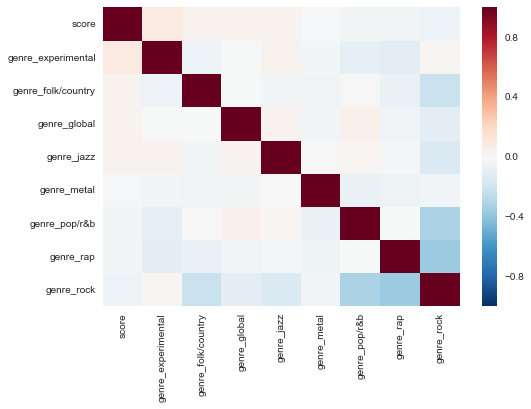

In [21]:
sns.heatmap(pf_relevant_col.corr())

In [22]:
pf_relevant_col.corr()

,score,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock
score,1.000000,0.091040,0.032102,0.038716,0.038425,-0.010486,-0.028654,-0.026193,-0.056711
genre_experimental,0.091040,1.000000,-0.060890,-0.007586,0.032477,-0.029039,-0.089772,-0.105993,0.021654
genre_folk/country,0.032102,-0.060890,1.000000,-0.005990,-0.023931,-0.036628,0.004103,-0.067336,-0.220348
genre_global,0.038716,-0.007586,-0.005990,1.000000,0.023754,-0.027837,0.054463,-0.032920,-0.103618
genre_jazz,0.038425,0.032477,-0.023931,0.023754,1.000000,0.004548,0.017682,-0.022477,-0.155460
genre_metal,-0.010486,-0.029039,-0.036628,-0.027837,0.004548,1.000000,-0.062915,-0.052938,-0.031992
genre_pop/r&b,-0.028654,-0.089772,0.004103,0.054463,0.017682,-0.062915,1.000000,-0.004654,-0.319243
genre_rap,-0.026193,-0.105993,-0.067336,-0.032920,-0.022477,-0.052938,-0.004654,1.000000,-0.363875
genre_rock,-0.056711,0.021654,-0.220348,-0.103618,-0.155460,-0.031992,-0.319243,-0.363875,1.000000


Experimental genre has the highest correlation with the review score, i.e. experimental genre tends to have higher review scores on average than other genres. Let's check if that difference is statistically significant.

In [23]:
def scores_partition(df, catvar, measurement, catvarvals):
    """Partition the measurements based on the values in the catvar column that are in catvarvals
    df: dataframe
    catvar: name of categorical variable in the dataframe that is to be checked 
    catvarvals: a list of catvar values on which to partition the rows of dataframe df
    measurement: the name of the continuous variable to be sliced from the partitioned dataframe
    """
    array_1 = np.array(df[df[catvar].isin(catvarvals)][measurement])
    array_2 = np.array(df[-df[catvar].isin(catvarvals)][measurement])
    return array_1, array_2

In [24]:
from scipy import stats
import math

In [25]:
def two_sample_z(sample1, sample2):
    """Calculate two-sample z-score"""
    return (sample1.mean() - sample2.mean()) / (math.sqrt(sample1.std()**2/len(sample1) + sample2.std()**2/len(sample2)))

In [26]:
exp_scores, non_exp_scores = scores_partition(pf_relevant_col, 'genre_experimental', 'score', [1])
exp_scores[:5]

array([8.4, 8.9, 8.2, 8.3, 6.8])

In [30]:
z_exp = two_sample_z(exp_scores, non_exp_scores)
print("z-score = ", z_exp)

z-score =  13.244405059833037


In [31]:
print('p-val = ', stats.norm.sf(z_exp)) 

p-val =  2.4305937011431297e-40


## The difference in score means for albums of experimental genre versus albums of other genres is statistically significant.

# 2. Let's try performing a sentiment analysis on the album titles and see if that has any bearing on the review scores.

In [32]:
from textblob import TextBlob

title_sentiment = (pf_all_genres['title']).apply(lambda x: TextBlob(x).sentiment)
title_sentiment[:5]

reviewid_main
1                     (0.1, 0.4)
6     (0.21428571428571427, 0.5)
7                     (0.5, 0.7)
8                     (0.4, 0.7)
10                    (0.0, 0.0)
Name: title, dtype: object

In [33]:
pf_all_genres['title_subj'] = title_sentiment.map(lambda x: x.subjectivity)
pf_all_genres['title_pol'] = title_sentiment.map(lambda x: x.polarity)
pf_all_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16015 entries, 1 to 22745
Data columns (total 26 columns):
content               16015 non-null object
genre                 16015 non-null object
label                 15969 non-null object
title                 16015 non-null object
artist                16015 non-null object
url                   16015 non-null object
score                 16015 non-null float64
best_new_music        16015 non-null int64
author                16015 non-null object
author_type           12528 non-null object
pub_date              16015 non-null datetime64[ns]
pub_weekday           16015 non-null int64
pub_day               16015 non-null int64
pub_month             16015 non-null int64
pub_year              16015 non-null int64
year                  15650 non-null float64
genre_experimental    16015 non-null float64
genre_folk/country    16015 non-null float64
genre_global          16015 non-null float64
genre_jazz            16015 non-null float64
ge

In [35]:
pf_all_genres[['score', 'title_subj', 'title_pol']].corr()

,score,title_subj,title_pol
score,1.000000,0.023072,0.006612
title_subj,0.023072,1.000000,0.270756
title_pol,0.006612,0.270756,1.000000


## Sentiment of album titles does not seem to have a significant bearing on the score.

# 3. Let's see if Pitchfork tends to give higher review scores to certain music labels.

In [36]:
pf_all_genres['score'].describe()

count    16015.000000
mean         7.004396
std          1.302481
min          0.000000
25%          6.400000
50%          7.200000
75%          7.800000
max         10.000000
Name: score, dtype: float64

In [37]:
all_label_stats = pf_all_genres.groupby('label', as_index = False)['score'].agg({'score': ['mean', 'std', 'median', 'count']}).sort_values(by = ('score', 'count'), ascending = False)

In [38]:
all_label_stats.dropna(inplace = True)

Let's only consider labels that received 30 or more album reviews.

In [39]:
thirty_revs_plus = all_label_stats[all_label_stats[('score', 'count')]>=30]
thirty_revs_plus.sort_values(by = ('score', 'mean'), inplace = True, ascending = False)
thirty_revs_plus

C:\Users\Dinara\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


label     score                       
                                mean       std median count
1564    light in the attic  7.956098  1.007484   8.00    41
2214                 rhino  7.798305  1.536509   8.10    59
2106         profound lore  7.624324  0.774383   7.80    37
884                    emi  7.563636  1.745815   7.70    77
1333              hyperdub  7.445714  0.776623   7.40    35
855          editions mego  7.443750  0.828889   7.65    32
1360             important  7.422857  0.667341   7.40    35
2632           thirsty ear  7.403125  1.112824   7.60    32
38                     4ad  7.398276  1.238441   7.60   116
2192               relapse  7.378947  0.954193   7.60    76
1674               matador  7.374302  1.337451   7.70   179
1516                kranky  7.359223  1.102976   7.40   103
782                 domino  7.344828  1.093188   7.40   203
1369            in the red  7.333333  0.946765   7.50    45
2394           slumberland  7.332432  0.621403   7.40    37
616          constellation  7.328205  0.944220   7.60    39
909                epitaph  7.312500  1.195624   7.65    32
73       absolutely kosher  7.300000  1.200641   7.40    40
796              drag city  7.286636  1.012631   7.50   217
732                    dfa  7.273333  0.925743   7.10    45
1704                 merge  7.261364  0.987644   7.40   220
1586                  load  7.256410  0.867178   7.30    39
1712        mexican summer  7.256000  0.852167   7.50    50
1994             paper bag  7.248780  0.572329   7.10    41
2283          sacred bones  7.246032  0.753663   7.40    63
494        captured tracks  7.227273  0.812963   7.30    55
947                 fabric  7.208824  1.055252   7.25    34
320        beggars banquet  7.206061  1.076435   7.20    33
2456         southern lord  7.205714  1.309680   7.50    35
1431            jagjaguwar  7.204615  0.858958   7.30   130
...                    ...       ...       ...    ...   ...
177                anticon  6.773333  1.196586   7.00    60
2164                   rca  6.744118  1.650182   6.95    68
293                 barsuk  6.722535  1.494676   7.10    71
2217           rhymesayers  6.717143  1.042476   6.60    35
2000            parlophone  6.660000  1.610868   7.00    30
873                elektra  6.658333  1.899530   7.20    36
907                   epic  6.656452  1.915649   7.10    62
2078             polyvinyl  6.629703  1.183262   6.70   101
2652            tigerbeat6  6.620000  1.109023   6.85    30
227                    ato  6.602128  1.179257   6.80    47
492                capitol  6.579279  2.063806   6.80   111
2803                  vice  6.568571  1.514007   6.90    35
2006            paw tracks  6.543333  1.715785   6.70    30
2286          saddle creek  6.523288  1.144737   6.70    73
1472                kanine  6.494595  1.244308   6.70    37
2813                virgin  6.460976  2.016093   6.85    82
2781                    v2  6.452941  1.492026   6.70    51
2464               spinart  6.451515  1.377525   6.70    33
224               atlantic  6.445794  1.677446   6.80   107
2833          warner bros.  6.417391  1.786266   6.70   115
1773                  morr  6.416216  1.532702   6.70    37
1419                island  6.409459  1.978803   6.65    74
1405            interscope  6.393204  1.788978   6.70   103
2713  troubleman unlimited  6.328571  1.807431   7.20    35
218            astralwerks  6.276978  1.771527   6.70   139
1112                geffen  6.246296  1.968594   6.65    54
2782               vagrant  6.243590  1.620720   6.60    39
1832              nettwerk  6.231250  1.350373   6.60    32
2295             sanctuary  6.091176  1.996416   6.35    34
1430             jade tree  6.065789  2.011760   6.80    38

[105 rows x 5 columns]

In [40]:
thirty_revs_plus.sort_values(by = ('score', 'median'), ascending = False).head()

label     score                       
                              mean       std median count
2214               rhino  7.798305  1.536509    8.1    59
1564  light in the attic  7.956098  1.007484    8.0    41
2106       profound lore  7.624324  0.774383    7.8    37
1674             matador  7.374302  1.337451    7.7   179
884                  emi  7.563636  1.745815    7.7    77

## Let's  see if top 10% of labels by median score receive scores that are statistically significantly higher than other labels.

In [41]:
# partition the score series by the highest scoring label names
labels_10 = np.array(thirty_revs_plus.sort_values(by = ('score', 'median'), ascending = False).head(10)['label'])
labels_10

array(['rhino', 'light in the attic', 'profound lore', 'matador', 'emi',
       'editions mego', 'epitaph', 'constellation', 'relapse', '4ad'],
      dtype=object)

In [42]:
top10, other_than_10 = scores_partition(pf_all_genres, 'label', 'score', labels_10)
len(top10)

688

In [43]:
z_label = two_sample_z(top10, other_than_10)
print("z-score = ", z_label)                

z-score =  10.054282183405464


In [44]:
print('p-val = ', stats.norm.sf(z_label)) 

p-val =  4.398005412824096e-24


## The top 10% out of music labels with 30+ reviews, receive statistically significantly higher ratings than the rest of the labels. These labels are 'rhino', 'light in the attic', 'profound lore', 'matador', 'emi', 'editions mego', 'epitaph', 'constellation', 'relapse', and '4ad'.

# 4. Let's run similar analysis for authors of the album reviews.

Let's make sure we are only considering active authors. Please note that we have reviews published up to January 8, 2017, so will assume an author is active if they reviewed an album in the 6 months before January 8, 2017. Therefore, the cut-off date to determine which authors are active is June 8, 2016. <br>We give them so much time, because Pitchfork review numbers peak at summer time, so a natural slump may occure in the fall and winter.

In [46]:
author_stats_wdates = pf_all_genres.groupby('author', as_index = False)[['score', 'pub_date']].agg({'score': ['mean', 'std', 'median', 'count'], 'pub_date': 'max'}).sort_values(by = ('score', 'count'), ascending = False)
author_stats_wdates.head(10)

author     score                          pub_date
                             mean       std median count        max
190         joe tangari  7.300904  0.953361    7.5   664 2015-02-06
392  stephen m. deusner  7.007132  1.245167    7.3   631 2016-07-28
154           ian cohen  6.361502  1.571182    6.5   626 2017-01-04
58           brian howe  7.066222  0.935381    7.3   450 2016-12-27
254     mark richardson  7.594508  1.289982    7.8   437 2016-12-01
245          marc hogan  6.595823  1.511763    6.8   407 2016-12-23
400       stuart berman  7.109877  1.091325    7.2   405 2016-12-07
297         nate patrin  7.004795  1.251656    7.3   292 2017-01-08
172       jayson greene  7.144615  1.278547    7.4   260 2016-10-28
51       brandon stosuy  7.516216  1.073955    7.8   259 2016-05-18

Let's only consider authors who reviewed 30 or more albums.

In [47]:
author_30plus_active = author_stats_wdates[(author_stats_wdates[('score','count')]>=30) & (author_stats_wdates[('pub_date', 'max')] > '2016-06-08')]
author_30plus_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 392 to 213
Data columns (total 6 columns):
(author, )         40 non-null object
(score, mean)      40 non-null float64
(score, std)       40 non-null float64
(score, median)    40 non-null float64
(score, count)     40 non-null int64
(pub_date, max)    40 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 2.2+ KB


## If we again go for top 10% of active authors by median score, we will only have four authors. That is very limiting, as it would be hard to have an album reviewed by one of these four, if our results prove to be statistically significant. Let's instead go for top 10 active authors.

In [48]:
top10_auth_active = np.array(author_30plus_active.sort_values(by = ('score', 'median'), ascending = False).head(10)['author'])
top10_auth_active

array(['jenn pelly', 'seth colter walls', 'mark richardson',
       'grayson haver currin', 'david drake', 'philip sherburne',
       "andy o'connor", 'andy beta', 'amanda petrusich', 'marc masters'],
      dtype=object)

In [49]:
top10_auth_active_scores, other_auth_scores = scores_partition(pf_all_genres, 'author', 'score', top10_auth_active)
len(top10_auth_active_scores)

1551

In [50]:
z_active_auth = two_sample_z(top10_auth_active_scores, other_auth_scores)
z_active_auth

19.784298886250834

In [51]:
print('p-val = ', stats.norm.sf(z_active_auth)) 

p-val =  2.032559862642909e-87


## Top ten authors by median album score indeed give on average higher review scores.

## *Important considerations:*

These results do not conclusively prove that given a new album of experimental genre, and/or produced by one of the top 10 music labels, and/or reviewed by the authors we identified, will necessarily receive a good review score. Selection bias may have influenced the data in some or all of these dimensions, i.e.:
+ Does Pitchfork select only good experimental albums to review?
+ Does Pitchfork for some reason only review good albums produced by the music labels we identified? 
+ Do the authors that we identified as giving high scores actually opt out of reviewing albums that they know are no good? Or maybe they are assigned better albums to review by someone else?